In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DO_NORM = True
# DO_NORM = False
DO_FLIPPED = False
# DO_FLIPPED = True

if DO_FLIPPED:
    fp = "/home/ivanlee/icl-arch/nl_icl/nl_icl_flipped.jsonl"
else:
    fp = "/home/ivanlee/icl-arch/nl_icl/nl_icl.jsonl"
df = pd.read_json(fp, lines=True)
df.head()

,model,avg_accs,ex_class
0,"{'_name_': 'safari', 'd_model': 128, 'n_layer'...","[0.341999999999999, 0.6920000000000001, 0.77, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,"{'_name_': 'llama2', 'd_model': 288, 'd_inner'...","[0.21500000000000002, 0.7210000000000001, 0.81...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
2,"{'_name_': 'dynamicconv', 'd_model': 768, 'd_i...","[0.0645, 0.3955, 0.5055000000000001, 0.5710000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
3,"{'_name_': 'lightconv', 'd_model': 768, 'd_inn...","[0.1575, 0.515999999999999, 0.5770000000000001...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
4,"{'_name_': 'lstm', 'd_model': 128, 'n_layer': ...","[0.28, 0.47150000000000003, 0.536, 0.51, 0.494...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"


In [2]:
# create new column with model['_name_']
df['model_name'] = df['model'].apply(lambda x: x['_name_'])
df

,model,avg_accs,ex_class,model_name
0,"{'_name_': 'safari', 'd_model': 128, 'n_layer'...","[0.341999999999999, 0.6920000000000001, 0.77, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",safari
1,"{'_name_': 'llama2', 'd_model': 288, 'd_inner'...","[0.21500000000000002, 0.7210000000000001, 0.81...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",llama2
2,"{'_name_': 'dynamicconv', 'd_model': 768, 'd_i...","[0.0645, 0.3955, 0.5055000000000001, 0.5710000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",dynamicconv
3,"{'_name_': 'lightconv', 'd_model': 768, 'd_inn...","[0.1575, 0.515999999999999, 0.5770000000000001...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",lightconv
4,"{'_name_': 'lstm', 'd_model': 128, 'n_layer': ...","[0.28, 0.47150000000000003, 0.536, 0.51, 0.494...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",lstm
5,"{'_name_': 'rnn', 'd_model': 128, 'n_layer': 3...","[0.225, 0.2515, 0.254, 0.28600000000000003, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",rnn
6,"{'_name_': 'gru', 'd_model': 128, 'n_layer': 1...","[0.035, 0.37300000000000005, 0.447999999999999...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",gru
7,"{'_name_': 'rwkv', 'max_seq_len': 1024, 'd_mod...","[0.17500000000000002, 0.577, 0.6965, 0.7315, 0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",rwkv
8,"{'_name_': 'retnet', 'd_model': 768, 'd_inner'...","[0.049999999999999004, 0.4495, 0.583, 0.656500...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",retnet
9,"{'layer': {'_name_': 'h3', 'd_state': 64, 'hea...","[0.17649999999999902, 0.676, 0.734499999999999...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",safari


In [3]:
# if model_name == 'safari', get the real name from model['layer']['_name_']
df['model_name'] = df.apply(lambda x: x['model']['layer']['_name_'] if x['model_name'] == 'safari' else x['model_name'], axis=1)
df

,model,avg_accs,ex_class,model_name
0,"{'_name_': 'safari', 'd_model': 128, 'n_layer'...","[0.341999999999999, 0.6920000000000001, 0.77, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",hyena
1,"{'_name_': 'llama2', 'd_model': 288, 'd_inner'...","[0.21500000000000002, 0.7210000000000001, 0.81...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",llama2
2,"{'_name_': 'dynamicconv', 'd_model': 768, 'd_i...","[0.0645, 0.3955, 0.5055000000000001, 0.5710000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",dynamicconv
3,"{'_name_': 'lightconv', 'd_model': 768, 'd_inn...","[0.1575, 0.515999999999999, 0.5770000000000001...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",lightconv
4,"{'_name_': 'lstm', 'd_model': 128, 'n_layer': ...","[0.28, 0.47150000000000003, 0.536, 0.51, 0.494...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",lstm
5,"{'_name_': 'rnn', 'd_model': 128, 'n_layer': 3...","[0.225, 0.2515, 0.254, 0.28600000000000003, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",rnn
6,"{'_name_': 'gru', 'd_model': 128, 'n_layer': 1...","[0.035, 0.37300000000000005, 0.447999999999999...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",gru
7,"{'_name_': 'rwkv', 'max_seq_len': 1024, 'd_mod...","[0.17500000000000002, 0.577, 0.6965, 0.7315, 0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",rwkv
8,"{'_name_': 'retnet', 'd_model': 768, 'd_inner'...","[0.049999999999999004, 0.4495, 0.583, 0.656500...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",retnet
9,"{'layer': {'_name_': 'h3', 'd_state': 64, 'hea...","[0.17649999999999902, 0.676, 0.734499999999999...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",h3


In [4]:
# normalize avg_accs relative to the first value of `avg_accs`.
# this means the first value of `avg_accs` will be 0, and the rest will be relative to that.
if DO_NORM:
    df['avg_accs'] = df['avg_accs'].apply(lambda x: [0] + [y - x[0] for y in x[1:]])
    df

In [5]:
style_map = {
    'rnn': {'color': '#1f77b4', 'linestyle': 'solid', 'marker': 'o'},  # Solid line, circle marker
    'lstm': {'color': '#1f77b4', 'linestyle': '--', 'marker': 's'},  # Dashed line, square marker
    'gru': {'color': '#1f77b4', 'linestyle': ':', 'marker': '^'},  # Dash-dot line, triangle up marker

    'lightconv': {'color': '#ff7f0e', 'linestyle': 'solid', 'marker': 'D'},  # Solid line, diamond marker
    'dynamicconv': {'color': '#ff7f0e', 'linestyle': '--', 'marker': 'v'},  # Dashed line, triangle down marker

    's4': {'color': '#2ca02c', 'linestyle': 'solid', 'marker': '<'},  # Solid line, triangle left marker
    'h3': {'color': '#2ca02c', 'linestyle': '--', 'marker': '>'},  # Dashed line, triangle right marker
    'hyena': {'color': '#2ca02c', 'linestyle': '-.', 'marker': 'p'},  # Dash-dot line, pentagon marker
    'mamba': {'color': '#2ca02c', 'linestyle': ':', 'marker': 'X'},  # Dotted line, x marker

    'llama2': {'color': '#d62728', 'linestyle': '--', 'marker': 'H'},  # Dashed line, hexagon marker
    'gpt2': {'color': '#d62728', 'linestyle': 'solid', 'marker': '*'},  # Dash-dot line, star marker

    'retnet': {'color': '#9467bd', 'linestyle': 'solid', 'marker': 'P'},  # Solid line, plus (filled) marker
    'rwkv': {'color': '#9467bd', 'linestyle': '--', 'marker': '^'},  # Dashed line, vertical line marker

    'gpt2-small': {'color': 'black', 'linestyle': 'solid', 'marker': '$S$'},  # Solid line, cross marker
    'gpt2-xl': {'color': 'black', 'linestyle': '--', 'marker': '$L$'},  # Dashed line, cross marker
}

legend_order = ['gpt2-xl', 'gpt2-small', 'rnn', 'lstm', 'gru', 'lightconv', 'dynamicconv', 's4', 'h3', 'hyena', 'mamba', 'retnet', 'rwkv', 'gpt2', 'llama2']

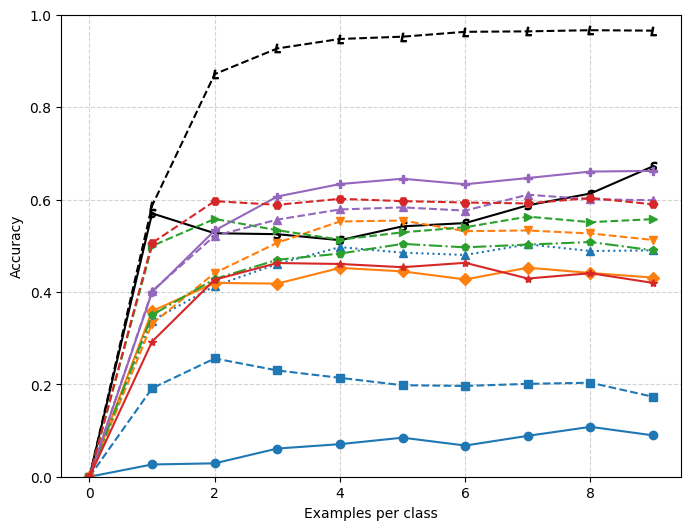

In [6]:
# create plot that we will populate
# for i, row in df.iterrows():
plt.figure(figsize=(8, 6))
for model_name in legend_order:
    row = df[df['model_name'] == model_name]
    # if row is empty, skip
    if row.empty:
        continue
    row = row.iloc[0]
    avg_accs = row["avg_accs"]
    plt.plot(avg_accs, label=model_name, **style_map[model_name])
plt.ylim(0, 1)
# x axis label is Examples per class
# add gridlines
plt.grid(color="lightgrey", linestyle="--")
plt.xlabel("Examples per class")
plt.ylabel('Accuracy')
if DO_FLIPPED:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

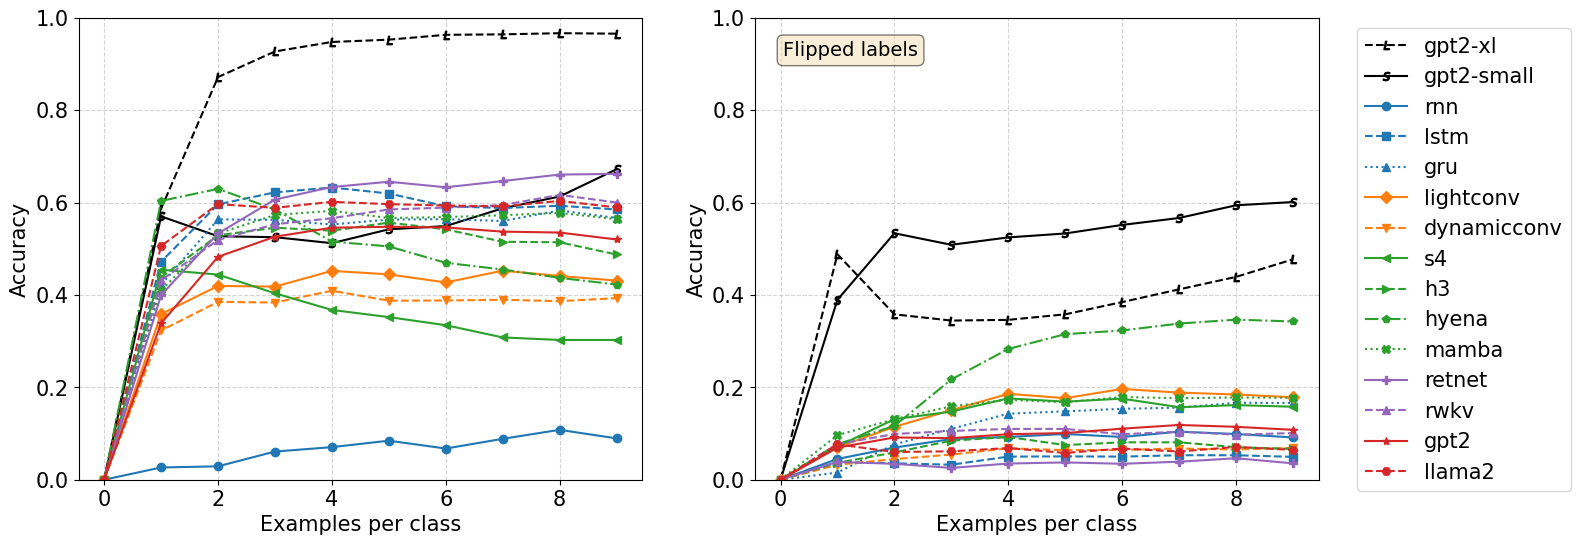

In [7]:
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# plot non-flipped in first subplot
fps = ["/home/ivanlee/icl-arch/nl_icl/nl_icl_f.jsonl", "/home/ivanlee/icl-arch/nl_icl/nl_icl_flipped_f.jsonl"]

for i, fp in enumerate(fps):
    ax = axes[i]
    df = pd.read_json(fp, lines=True)
    df['model_name'] = df['model'].apply(lambda x: x['_name_'])
    df['model_name'] = df.apply(lambda x: x['model']['layer']['_name_'] if x['model_name'] == 'safari' else x['model_name'], axis=1)
    if DO_NORM:
        df['avg_accs'] = df['avg_accs'].apply(lambda x: [0] + [y - x[0] for y in x[1:]])
    for model_name in legend_order:
        row = df[df['model_name'] == model_name]
        # if row is empty, skip
        if row.empty:
            continue
        row = row.iloc[0]
        avg_accs = row["avg_accs"]
        ax.plot(avg_accs, label=model_name, **style_map[model_name])
    ax.set_ylim(0, 1)
    # x axis label is Examples per class
    # add gridlines
    ax.grid(color="lightgrey", linestyle="--")
    ax.set_xlabel("Examples per class")
    ax.set_ylabel('Accuracy')


# add text to upper left that says "Flipped labels" only to second subplot
ax.text(0.05, 0.95, "Flipped labels", transform=ax.transAxes, fontsize=14,
    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

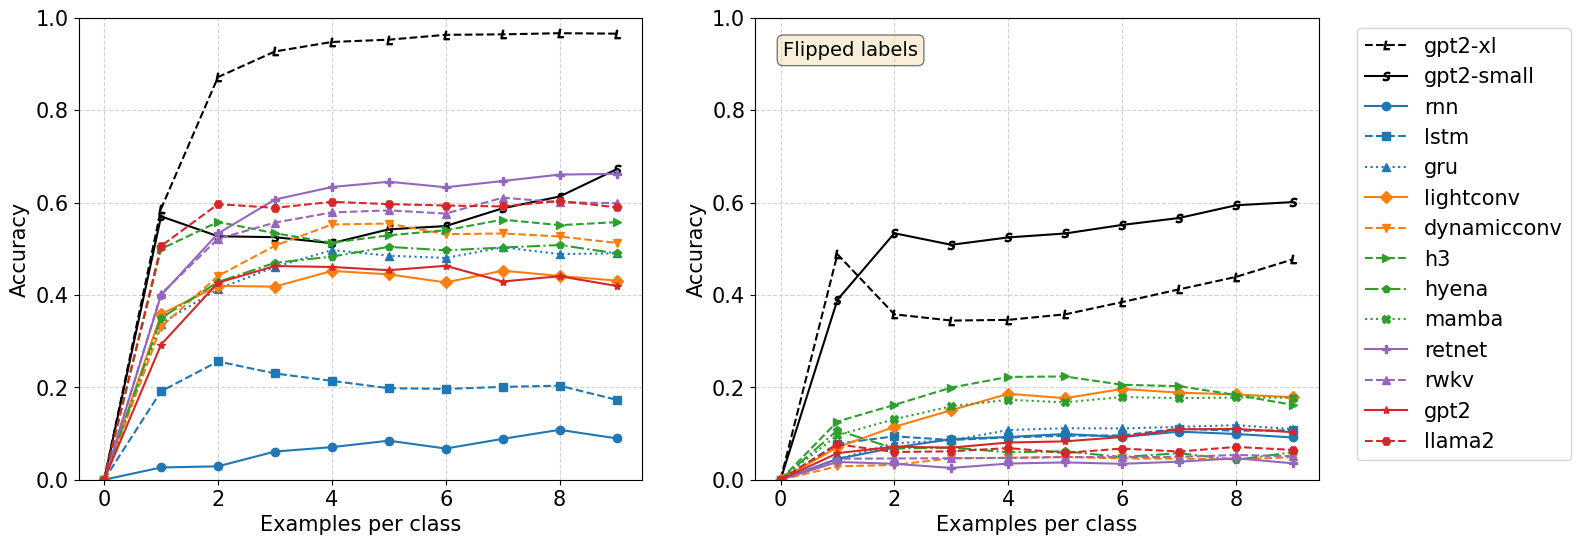

In [8]:
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# plot non-flipped in first subplot
fps = ["/home/ivanlee/icl-arch/nl_icl/nl_icl.jsonl", "/home/ivanlee/icl-arch/nl_icl/nl_icl_flipped.jsonl"]

for i, fp in enumerate(fps):
    ax = axes[i]
    df = pd.read_json(fp, lines=True)
    df['model_name'] = df['model'].apply(lambda x: x['_name_'])
    df['model_name'] = df.apply(lambda x: x['model']['layer']['_name_'] if x['model_name'] == 'safari' else x['model_name'], axis=1)
    if DO_NORM:
        df['avg_accs'] = df['avg_accs'].apply(lambda x: [0] + [y - x[0] for y in x[1:]])
    for model_name in legend_order:
        row = df[df['model_name'] == model_name]
        # if row is empty, skip
        if row.empty:
            continue
        row = row.iloc[0]
        avg_accs = row["avg_accs"]
        ax.plot(avg_accs, label=model_name, **style_map[model_name])
    ax.set_ylim(0, 1)
    # x axis label is Examples per class
    # add gridlines
    ax.grid(color="lightgrey", linestyle="--")
    ax.set_xlabel("Examples per class")
    ax.set_ylabel('Accuracy')


# add text to upper left that says "Flipped labels" only to second subplot
ax.text(0.05, 0.95, "Flipped labels", transform=ax.transAxes, fontsize=14,
    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')